In [2]:
from pathlib import Path
data_path = Path('../data/nasa.csv')

In [3]:
import pandas as pd
df = pd.read_csv(data_path)

In [4]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [90]:
import requests
import time
import random

for i in range(100):
    response = requests.post(
        url='http://127.0.0.1:8080/serve/asteroid',
        headers={'accept': 'application/json', 'Content-Type': 'application/json'},
        json=df.loc[i, df.columns!='Hazardous'].to_dict()
    )
    print(df.loc[i, 'Absolute Magnitude'])
    print(df.loc[i, 'Minimum Orbit Intersection'])
    print(response.content, response.status_code)
    # time.sleep(random.randint(0, 10) / 10)

21.6
0.0252819
b'{"y":[1.0000041723251343]}' 200
21.3
0.186935
b'{"y":[1.307435923081357e-06]}' 200
20.3
0.0430579
b'{"y":[0.999923825263977]}' 200
27.4
0.0055118
b'{"y":[5.7882552937371656e-05]}' 200
21.6
0.034798
b'{"y":[0.9999979138374329]}' 200
19.6
0.272213
b'{"y":[1.651302409300115e-05]}' 200
19.6
0.272213
b'{"y":[1.651302409300115e-05]}' 200
19.2
0.0987582
b'{"y":[3.2662233024893794e-06]}' 200
17.8
0.109354
b'{"y":[3.2662233024893794e-06]}' 200
21.5
0.0169065
b'{"y":[0.9999768137931824]}' 200
22.4
0.000317965
b'{"y":[3.6328769056126475e-05]}' 200
25.8
0.00186378
b'{"y":[-5.345240879250923e-06]}' 200
25.0
0.0187898
b'{"y":[-1.8858065232052468e-05]}' 200
19.1
0.214004
b'{"y":[1.307435923081357e-06]}' 200
18.8
0.102643
b'{"y":[3.994216967839748e-05]}' 200
25.2
0.0119773
b'{"y":[-1.7658483557170257e-05]}' 200
20.0
0.240288
b'{"y":[1.9795917978626676e-05]}' 200
21.0
0.0984179
b'{"y":[-6.994183877395699e-06]}' 200
22.3
0.0259126
b'{"y":[-4.3933785491390154e-05]}' 200
22.7
0.0525422
b'

In [81]:
pd.cut(df['Minimum Orbit Intersection'], 3)

0       (-0.000476, 0.159]
1           (0.159, 0.319]
2       (-0.000476, 0.159]
3       (-0.000476, 0.159]
4       (-0.000476, 0.159]
               ...        
4682    (-0.000476, 0.159]
4683    (-0.000476, 0.159]
4684    (-0.000476, 0.159]
4685        (0.159, 0.319]
4686    (-0.000476, 0.159]
Name: Minimum Orbit Intersection, Length: 4687, dtype: category
Categories (3, interval[float64, right]): [(-0.000476, 0.159] < (0.159, 0.319] < (0.319, 0.478]]

# Generating new samples!

In [6]:
import matplotlib.pyplot as plt
from distfit import distfit

dist = distfit(todf=True)

Absolute Magnitude
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0144057] [loc=22.268 scale=2.891]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.176509] [loc=11.160 scale=11.108]
[distfit] >[pareto    ] [0.04 sec] [RSS: 0.227019] [loc=-0.032 scale=11.192]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0200432] [loc=22.256 scale=2.636]
[distfit] >[t         ] [0.06 sec] [RSS: 0.0144013] [loc=22.268 scale=2.891]
[distfit] >[genextreme] [0.07 sec] [RSS: 0.0106152] [loc=21.178 scale=2.768]
[distfit] >[gamma     ] [0.05 sec] [RSS: 0.0111975] [loc=2.344 scale=0.421]
[distfit] >[lognorm   ] [0.09 sec] [RSS: 0.0114192] [loc=-8.622 scale=30.755]
[distfit] >[beta      ] [0.07 sec] [RSS: 0.011365] [loc=10.167 scale=29.223]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.120983] [loc=11.160 scale=20.940]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 0.0145428] [loc=-734.747 scale=105.486]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


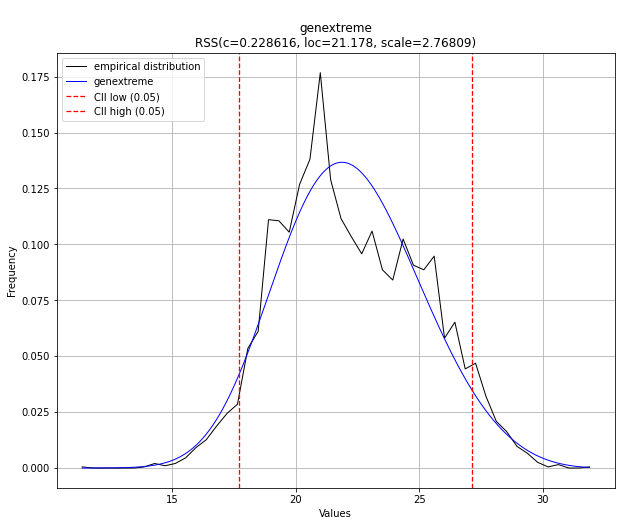

[distfit] >Generate 1000 genextreme distributed samples with fitted params (0.22861563186707, 21.178029875285688, 2.768092035310301).
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00360143] [loc=44.536 scale=5.781]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0441272] [loc=22.320 scale=22.216]
[distfit] >[pareto    ] [0.04 sec] [RSS: 0.0567545] [loc=-0.062 scale=22.382]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.00500939] [loc=44.512 scale=5.271]
[distfit] >[t         ] [0.06 sec] [RSS: 0.00360113] [loc=44.535 scale=5.781]
[distfit] >[genextreme] [0.23 sec] [RSS: 0.00265368] [loc=42.356 scale=5.536]
[distfit] >[gamma     ] [0.05 sec] [RSS: 0.00279938] [loc=4.688 scale=0.842]
[distfit] >[lognorm   ] [0.12 sec] [RSS: 0.0028548] [loc=-17.244 scale=61.510]
[distfit] >[beta      ] [0.07 sec] [RSS: 0.00284124] [loc=20.334 scale=58.447]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0302459] [loc=22.320 scale=4

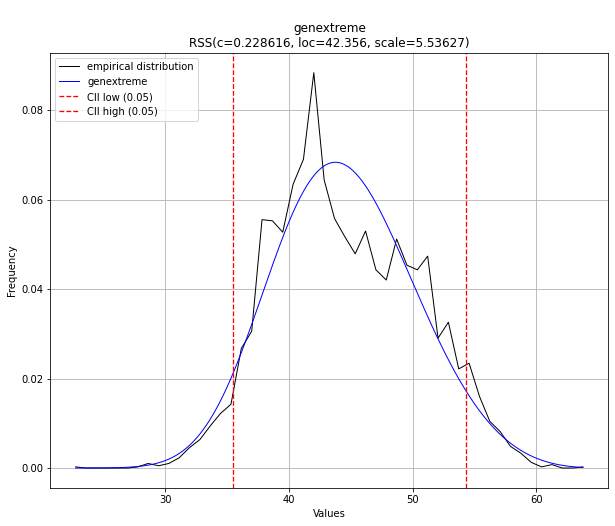

[distfit] >Generate 1000 genextreme distributed samples with fitted params (0.22861628735626255, 42.356002269204, 5.53627050286924).
avg_dia
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.952049] [loc=0.331 scale=0.598]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0351306] [loc=0.002 scale=0.329]
[distfit] >[pareto    ] [0.06 sec] [RSS: 0.614804] [loc=-0.096 scale=0.097]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 0.893813] [loc=0.059 scale=0.216]
[distfit] >[t         ] [0.03 sec] [RSS: 0.0393639] [loc=0.158 scale=0.150]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.332126] [loc=0.093 scale=0.110]
[distfit] >[gamma     ] [0.06 sec] [RSS: 2.44497] [loc=0.002 scale=1.541]
[distfit] >[lognorm   ] [0.03 sec] [RSS: 0.271968] [loc=0.001 scale=0.149]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.0569102] [loc=-0.145 scale=1725727453584.798]
[distfit] >[uniform   ] [0.00 sec] [RSS: 2.54754] [loc=0.002 scale=25.207]
[

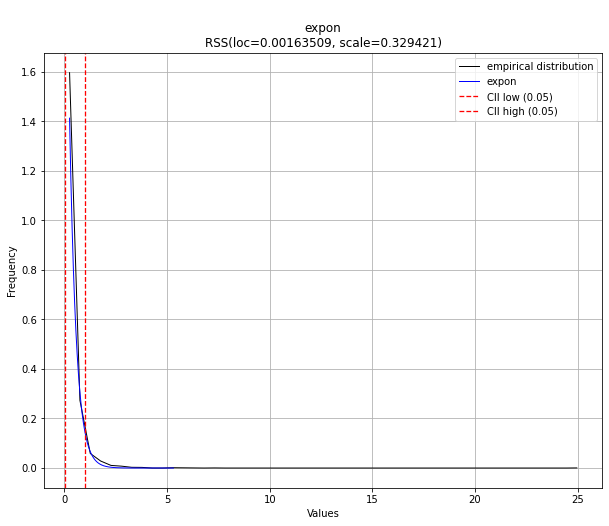

[distfit] >Generate 1000 expon distributed samples with fitted params (0.0016350936, 0.3294214611192447).
[distfit] >Generate 1000 expon distributed samples with fitted params (0.0016350936, 0.3294214611192447).
Relative Velocity km per hr
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.17485e-10] [loc=50294.920 scale=26252.800]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.57009e-09] [loc=1207.815 scale=49087.105]
[distfit] >[pareto    ] [0.04 sec] [RSS: 9.42697e-09] [loc=-0.389 scale=1208.204]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 1.90999e-10] [loc=48198.234 scale=21984.783]
[distfit] >[t         ] [0.05 sec] [RSS: 2.17502e-10] [loc=50295.414 scale=26253.240]
[distfit] >[genextreme] [0.26 sec] [RSS: 3.72345e-09] [loc=1208.901 scale=8.535]
[distfit] >[gamma     ] [0.02 sec] [RSS: 2.95294e-11] [loc=-1833.633 scale=13459.139]
[distfit] >[lognorm   ] [0.14 sec] [RSS: 3.65755e-09] [loc=1207.815 scale=1.

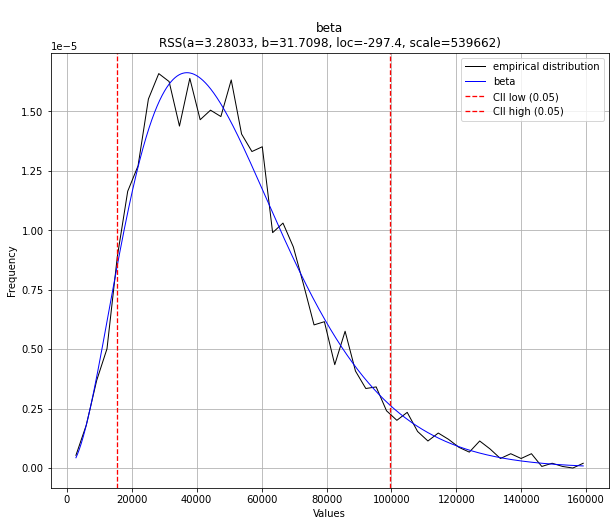

[distfit] >Generate 1000 beta distributed samples with fitted params (3.2803295386884592, 31.709773316777415, -297.399810399721, 539661.8216482248).
[distfit] >Generate 1000 beta distributed samples with fitted params (3.2803295386884592, 31.709773316777415, -297.399810399721, 539661.8216482248).
Miss Dist.(kilometers)
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.35462e-15] [loc=38413466.872 scale=21808770.881]
[distfit] >[expon     ] [0.00 sec] [RSS: 2.5833e-15] [loc=26609.887 scale=38386856.985]
[distfit] >[pareto    ] [0.06 sec] [RSS: 1.63293e-14] [loc=-58.557 scale=26668.443]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 1.47996e-15] [loc=37848561.605 scale=20787840.193]
[distfit] >[t         ] [0.05 sec] [RSS: 3.21764e-15] [loc=-94184.944 scale=44213370.105]
[distfit] >[genextreme] [0.10 sec] [RSS: 1.10503e-15] [loc=33263792.672 scale=23761969.414]
[distfit] >[gamma     ] [0.06 sec] [RSS: 1.36902e

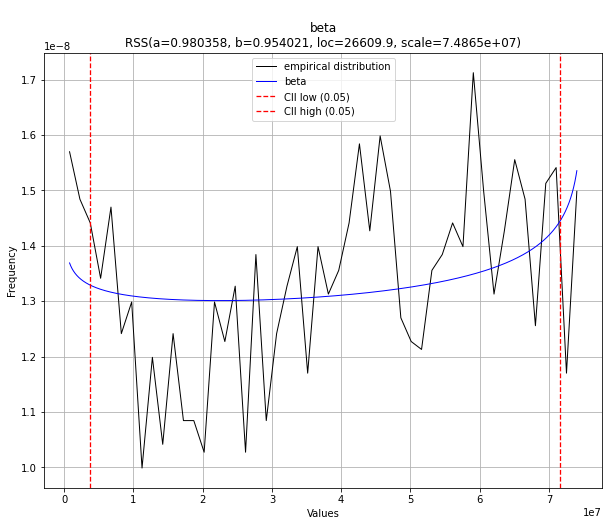

[distfit] >Generate 1000 beta distributed samples with fitted params (0.9803580407414849, 0.9540214248372402, 26609.886718749996, 74864997.47477567).
[distfit] >Generate 1000 beta distributed samples with fitted params (0.9803580407414849, 0.9540214248372402, 26609.886718749996, 74864997.47477567).
Orbit Uncertainity
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 4.34151] [loc=3.517 scale=3.078]
[distfit] >[expon     ] [0.00 sec] [RSS: 3.97214] [loc=0.000 scale=3.517]
[distfit] >[pareto    ] [0.03 sec] [RSS: 3.48267] [loc=-1.309 scale=1.309]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 4.03288] [loc=3.523 scale=3.198]
[distfit] >[t         ] [0.06 sec] [RSS: 4.3415] [loc=3.517 scale=3.078]
[distfit] >[genextreme] [0.25 sec] [RSS: 3.41315] [loc=0.001 scale=0.004]
[distfit] >[gamma     ] [0.06 sec] [RSS: 4.32766] [loc=-11.462 scale=0.625]
[distfit] >[lognorm   ] [0.13 sec] [RSS: 3.30604] [loc=-0.000 scale=1

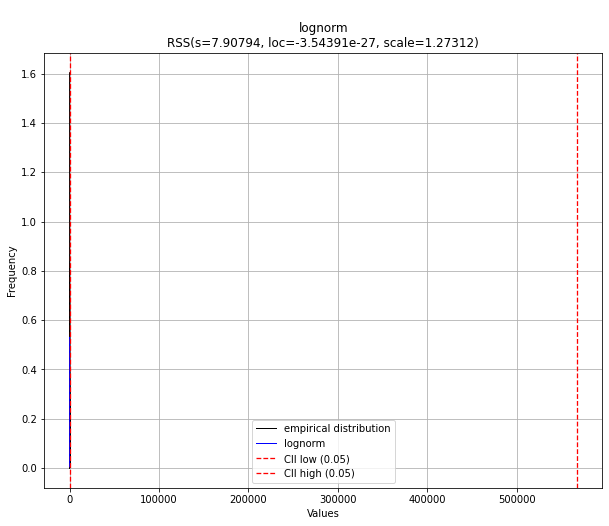

[distfit] >Generate 1000 lognorm distributed samples with fitted params (7.907939579263072, -3.543911499811584e-27, 1.2731208985776328).
[distfit] >Generate 1000 lognorm distributed samples with fitted params (7.907939579263072, -3.543911499811584e-27, 1.2731208985776328).
Minimum Orbit Intersection
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 420.543] [loc=0.082 scale=0.090]
[distfit] >[expon     ] [0.00 sec] [RSS: 88.9124] [loc=0.000 scale=0.082]
[distfit] >[pareto    ] [0.04 sec] [RSS: 26.3295] [loc=-0.129 scale=0.129]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 331.028] [loc=0.044 scale=0.064]
[distfit] >[t         ] [0.02 sec] [RSS: 322.036] [loc=0.048 scale=0.050]
[distfit] >[genextreme] [0.08 sec] [RSS: 67.2961] [loc=0.026 scale=0.033]
[distfit] >[gamma     ] [0.06 sec] [RSS: 21.1303] [loc=0.000 scale=0.119]
[distfit] >[lognorm   ] [0.05 sec] [RSS: 20.9779] [loc=-0.002 scale=0.041]
[distfit] >[b

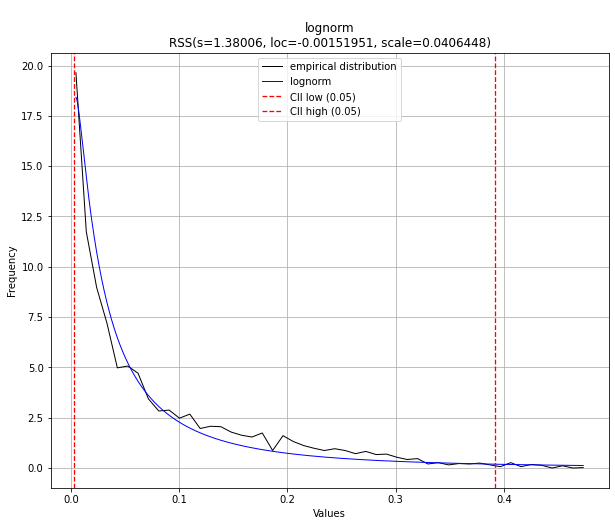

[distfit] >Generate 1000 lognorm distributed samples with fitted params (1.38006231654736, -0.0015195057255525022, 0.04064479425510782).
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 105.136] [loc=0.165 scale=0.181]
[distfit] >[expon     ] [0.00 sec] [RSS: 22.2281] [loc=0.000 scale=0.165]
[distfit] >[pareto    ] [0.05 sec] [RSS: 38.4167] [loc=-0.005 scale=0.005]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 82.7571] [loc=0.088 scale=0.127]
[distfit] >[t         ] [0.02 sec] [RSS: 80.5105] [loc=0.097 scale=0.101]
[distfit] >[genextreme] [0.09 sec] [RSS: 16.8256] [loc=0.051 scale=0.065]
[distfit] >[gamma     ] [0.06 sec] [RSS: 5.28259] [loc=0.000 scale=0.239]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 5.24464] [loc=-0.003 scale=0.081]
[distfit] >[beta      ] [0.10 sec] [RSS: 17.7615] [loc=0.000 scale=0.979]
[distfit] >[uniform   ] [0.00 sec] [RSS: 146.935] [loc=0.000 scale=0.956]
[distfit] >[loggamma  ] [0.05

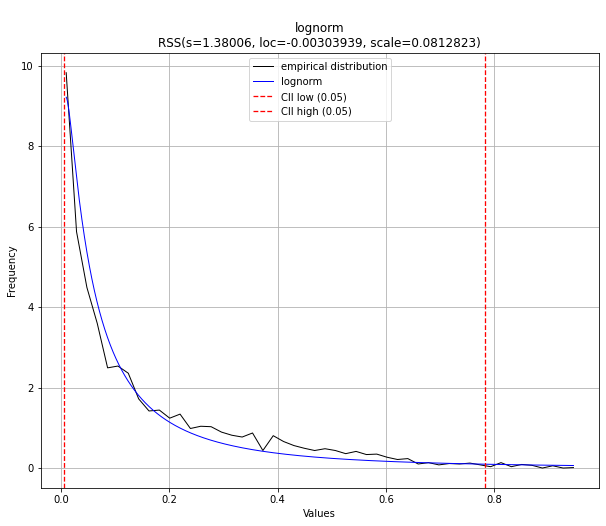

[distfit] >Generate 1000 lognorm distributed samples with fitted params (1.3800637542749856, -0.0030393893585528176, 0.08128233087486103).
Jupiter Tisserand Invariant
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.119935] [loc=5.056 scale=1.238]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.868172] [loc=2.196 scale=2.860]
[distfit] >[pareto    ] [0.03 sec] [RSS: 1.50676] [loc=-0.006 scale=2.202]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.141479] [loc=5.055 scale=1.139]
[distfit] >[t         ] [0.06 sec] [RSS: 0.119948] [loc=5.056 scale=1.238]
[distfit] >[genextreme] [0.06 sec] [RSS: 0.114776] [loc=4.594 scale=1.196]
[distfit] >[gamma     ] [0.08 sec] [RSS: 0.124704] [loc=-9.826 scale=0.103]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.126491] [loc=-11.565 scale=16.575]
[distfit] >[beta      ] [0.04 sec] [RSS: 0.0834296] [loc=2.158 scale=7.033]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.589775] [loc=2.196

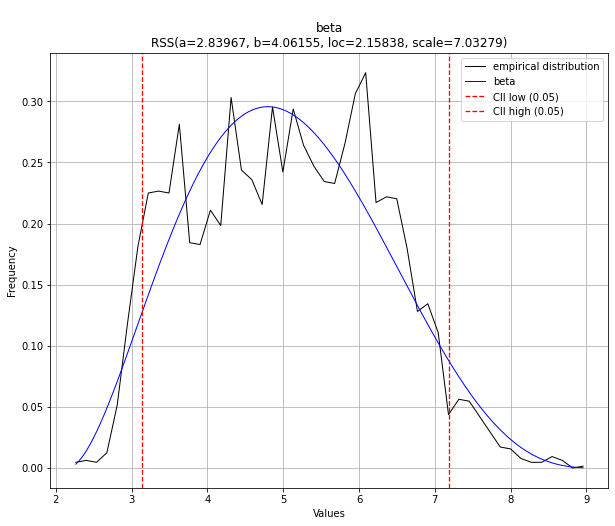

[distfit] >Generate 1000 beta distributed samples with fitted params (2.8396738896087754, 4.061549587283254, 2.1583767777381104, 7.032794783901686).
[distfit] >Generate 1000 beta distributed samples with fitted params (2.8396738896087754, 4.061549587283254, 2.1583767777381104, 7.032794783901686).
Epoch Osculation
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.66376e-05] [loc=2457723.608 scale=920.199]
[distfit] >[expon     ] [0.00 sec] [RSS: 3.00279e-05] [loc=2450164.500 scale=7559.108]
[distfit] >[pareto    ] [0.10 sec] [RSS: 3.0029e-05] [loc=-73.301 scale=2450237.801]
[distfit] >[dweibull  ] [0.11 sec] [RSS: 1.98009e-05] [loc=2458000.500 scale=467.553]
[distfit] >[t         ] [0.06 sec] [RSS: 2.86916e-05] [loc=2458961.332 scale=2409.302]
[distfit] >[genextreme] [0.23 sec] [RSS: 5.27806e-06] [loc=2457887.870 scale=164.373]
[distfit] >[gamma     ] [0.09 sec] [RSS: 3.02887e-05] [loc=2454685.500 scale

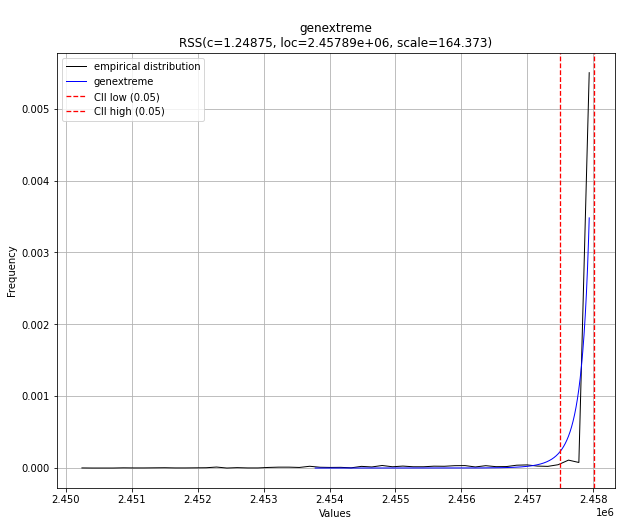

[distfit] >Generate 1000 genextreme distributed samples with fitted params (1.2487472021448873, 2457887.8699979596, 164.37259676629532).
[distfit] >Generate 1000 genextreme distributed samples with fitted params (1.2487472021448873, 2457887.8699979596, 164.37259676629532).
Eccentricity
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.84986] [loc=0.383 scale=0.180]
[distfit] >[expon     ] [0.00 sec] [RSS: 35.6727] [loc=0.008 scale=0.375]
[distfit] >[pareto    ] [0.09 sec] [RSS: 35.6728] [loc=-598286.714 scale=598286.722]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 4.93827] [loc=0.393 scale=0.163]
[distfit] >[t         ] [0.06 sec] [RSS: 2.85] [loc=0.383 scale=0.180]
[distfit] >[genextreme] [0.06 sec] [RSS: 2.06861] [loc=0.311 scale=0.167]
[distfit] >[gamma     ] [0.04 sec] [RSS: 2.10011] [loc=-0.269 scale=0.051]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 2.24149] [loc=-0.714 scale=1.082]
[distfit] >[beta   

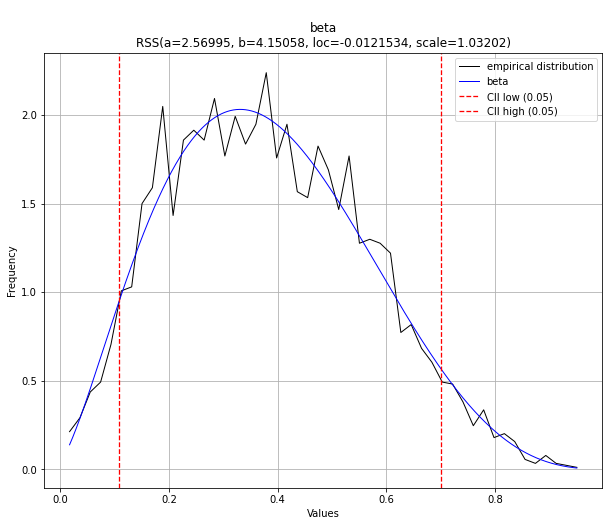

[distfit] >Generate 1000 beta distributed samples with fitted params (2.5699512394046877, 4.15058479578251, -0.012153369319836474, 1.0320154856798731).
[distfit] >Generate 1000 beta distributed samples with fitted params (2.5699512394046877, 4.15058479578251, -0.012153369319836474, 1.0320154856798731).
Semi Major Axis
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.86926] [loc=1.400 scale=0.524]
[distfit] >[expon     ] [0.00 sec] [RSS: 2.68893] [loc=0.616 scale=0.784]
[distfit] >[pareto    ] [0.04 sec] [RSS: 4.44138] [loc=-0.297 scale=0.913]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 1.30168] [loc=1.273 scale=0.423]
[distfit] >[t         ] [0.04 sec] [RSS: 1.62075] [loc=1.341 scale=0.455]
[distfit] >[genextreme] [0.06 sec] [RSS: 0.285156] [loc=1.123 scale=0.326]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.449466] [loc=0.614 scale=0.332]
[distfit] >[lognorm   ] [0.03 sec] [RSS: 0.247467] [loc=0.551 scale

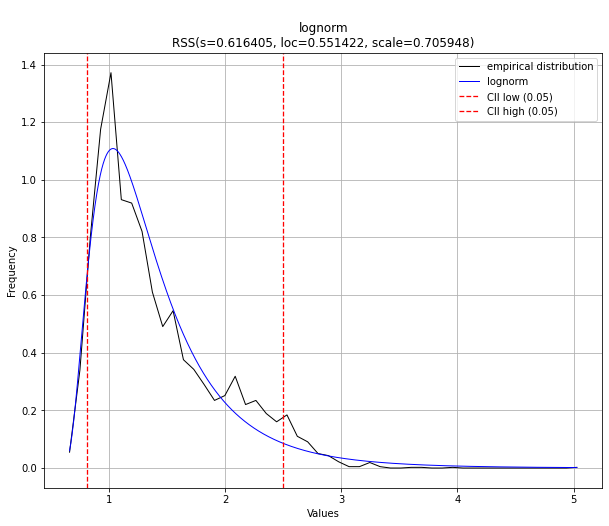

[distfit] >Generate 1000 lognorm distributed samples with fitted params (0.6164045241001512, 0.5514221245588664, 0.7059475701296852).
[distfit] >Generate 1000 lognorm distributed samples with fitted params (0.6164045241001512, 0.5514221245588664, 0.7059475701296852).
Inclination
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00477559] [loc=13.374 scale=10.935]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.00181336] [loc=0.015 scale=13.359]
[distfit] >[pareto    ] [0.10 sec] [RSS: 0.00166825] [loc=-166386.042 scale=166386.056]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0037433] [loc=11.482 scale=8.912]
[distfit] >[t         ] [0.07 sec] [RSS: 0.005504] [loc=13.645 scale=9.581]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.00112372] [loc=7.490 scale=6.397]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.000339705] [loc=-0.007 scale=9.448]
[distfit] >[lognorm   ] [0.12 sec] [RSS: 0.00063881] [loc=-1.677 scale=11.

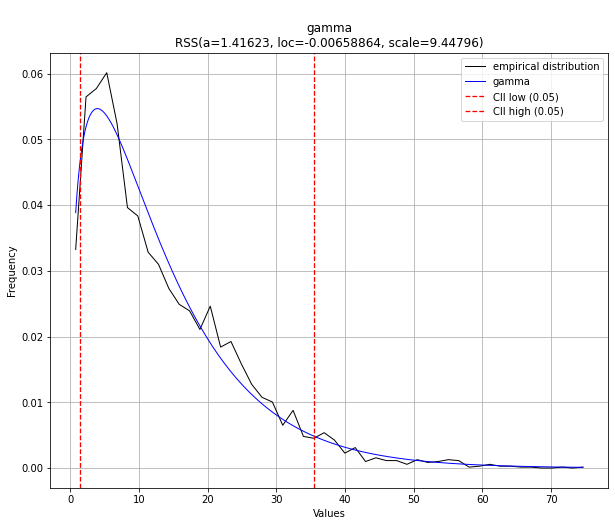

[distfit] >Generate 1000 gamma distributed samples with fitted params (1.4162286457631312, -0.006588635468994036, 9.447958617935724).
[distfit] >Generate 1000 gamma distributed samples with fitted params (1.4162286457631312, -0.006588635468994036, 9.447958617935724).
Asc Node Longitude
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 5.57826e-05] [loc=172.157 scale=103.266]
[distfit] >[expon     ] [0.00 sec] [RSS: 9.27915e-05] [loc=0.002 scale=172.155]
[distfit] >[pareto    ] [0.10 sec] [RSS: 7.80895e-05] [loc=-53066759.737 scale=53066759.739]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 6.51993e-05] [loc=163.410 scale=96.712]
[distfit] >[t         ] [0.06 sec] [RSS: 5.57972e-05] [loc=172.147 scale=103.254]
[distfit] >[genextreme] [0.20 sec] [RSS: 5.3356e-05] [loc=138.679 scale=103.585]
[distfit] >[gamma     ] [0.06 sec] [RSS: 5.55754e-05] [loc=-1546.111 scale=6.185]
[distfit] >[lognorm   ] [0.06 sec] [RSS:

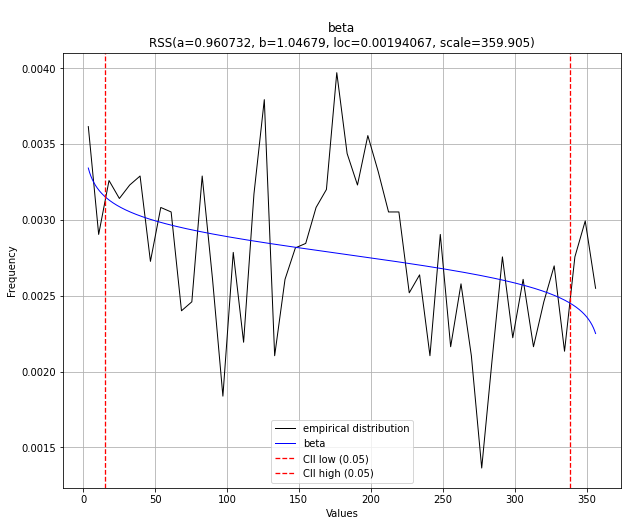

[distfit] >Generate 1000 beta distributed samples with fitted params (0.9607316666435651, 1.0467867734981584, 0.001940674157596179, 359.9050465614385).
[distfit] >Generate 1000 beta distributed samples with fitted params (0.9607316666435651, 1.0467867734981584, 0.001940674157596179, 359.9050465614385).
Orbital Period
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 4.73442e-06] [loc=635.582 scale=370.915]
[distfit] >[expon     ] [0.00 sec] [RSS: 3.55288e-06] [loc=176.557 scale=459.025]
[distfit] >[pareto    ] [0.04 sec] [RSS: 1.15166e-05] [loc=0.433 scale=176.124]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 2.96877e-06] [loc=515.386 scale=271.600]
[distfit] >[t         ] [0.06 sec] [RSS: 4.58427e-06] [loc=622.574 scale=348.179]
[distfit] >[genextreme] [0.25 sec] [RSS: 3.54823e-07] [loc=433.468 scale=187.394]
[distfit] >[gamma     ] [0.01 sec] [RSS: 1.17289e-06] [loc=176.301 scale=261.065]
[distfit] >[logno

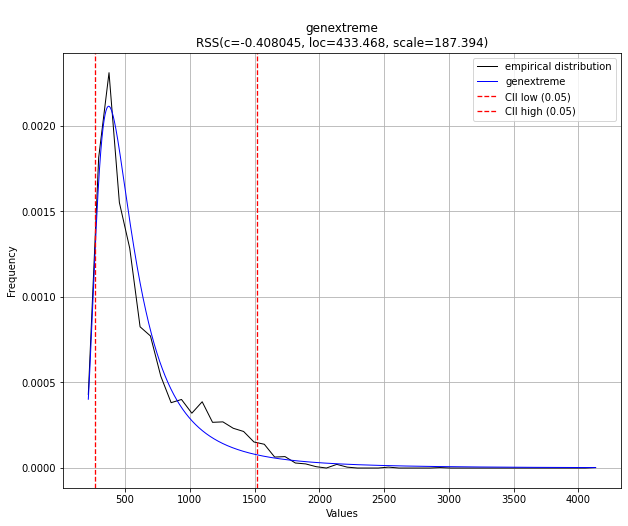

[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.4080453119748185, 433.4677489648435, 187.39397584982203).
[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.4080453119748185, 433.4677489648435, 187.39397584982203).
Perihelion Distance
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.46291] [loc=0.813 scale=0.242]
[distfit] >[expon     ] [0.00 sec] [RSS: 31.2749] [loc=0.081 scale=0.733]
[distfit] >[pareto    ] [0.11 sec] [RSS: 39.5204] [loc=-2903794.398 scale=2903794.478]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 3.45314] [loc=0.823 scale=0.219]
[distfit] >[t         ] [0.07 sec] [RSS: 2.46357] [loc=0.813 scale=0.242]
[distfit] >[genextreme] [0.23 sec] [RSS: 28.4395] [loc=0.822 scale=0.557]
[distfit] >[gamma     ] [0.06 sec] [RSS: 2.68347] [loc=-3.782 scale=0.013]
[distfit] >[lognorm   ] [0.13 sec] [RSS: 2.46404] [loc=-60.098 scale=60.910]
[dist

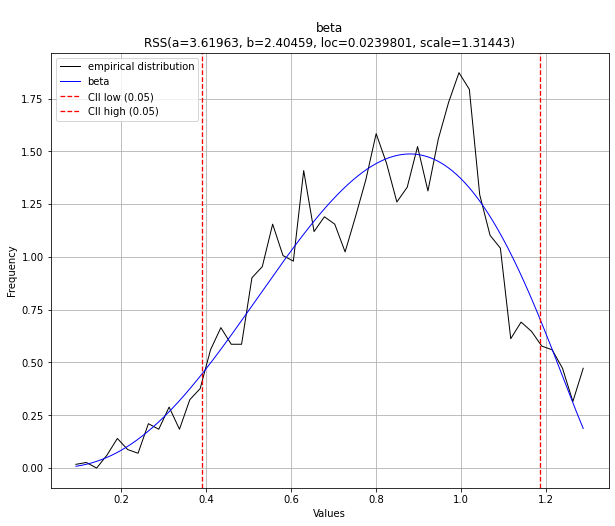

[distfit] >Generate 1000 beta distributed samples with fitted params (3.6196288400226093, 2.4045887665691588, 0.023980058677658435, 1.3144293692244353).
[distfit] >Generate 1000 beta distributed samples with fitted params (3.6196288400226093, 2.4045887665691588, 0.023980058677658435, 1.3144293692244353).
Perihelion Arg
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 5.46008e-05] [loc=183.932 scale=103.502]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000113257] [loc=0.007 scale=183.925]
[distfit] >[pareto    ] [0.06 sec] [RSS: 0.00116886] [loc=-2.470 scale=2.477]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 4.72771e-05] [loc=178.283 scale=99.991]
[distfit] >[t         ] [0.09 sec] [RSS: 5.46006e-05] [loc=183.932 scale=103.502]
[distfit] >[genextreme] [0.08 sec] [RSS: 4.63926e-05] [loc=157.286 scale=110.768]
[distfit] >[gamma     ] [0.08 sec] [RSS: 5.48502e-05] [loc=-4144.187 scale=2.479]
[distfit] >[lognorm 

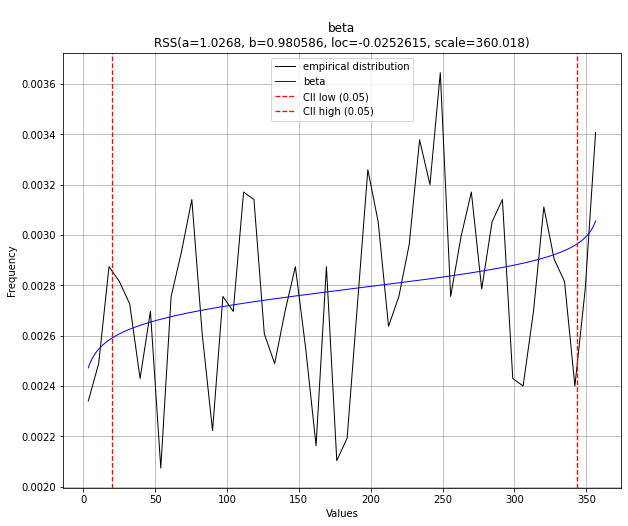

[distfit] >Generate 1000 beta distributed samples with fitted params (1.0268033720528789, 0.9805859018274712, -0.02526149075016175, 360.0183594207624).
[distfit] >Generate 1000 beta distributed samples with fitted params (1.0268033720528789, 0.9805859018274712, -0.02526149075016175, 360.0183594207624).
Aphelion Dist
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.11216] [loc=1.987 scale=0.951]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.838496] [loc=0.804 scale=1.183]
[distfit] >[pareto    ] [0.05 sec] [RSS: 1.34102] [loc=-0.257 scale=1.061]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.795554] [loc=1.687 scale=0.731]
[distfit] >[t         ] [0.04 sec] [RSS: 0.825788] [loc=1.718 scale=0.651]
[distfit] >[genextreme] [0.05 sec] [RSS: 0.105747] [loc=1.429 scale=0.445]
[distfit] >[gamma     ] [0.02 sec] [RSS: 0.363554] [loc=0.803 scale=0.669]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 0.133219] [loc=0.797 scal

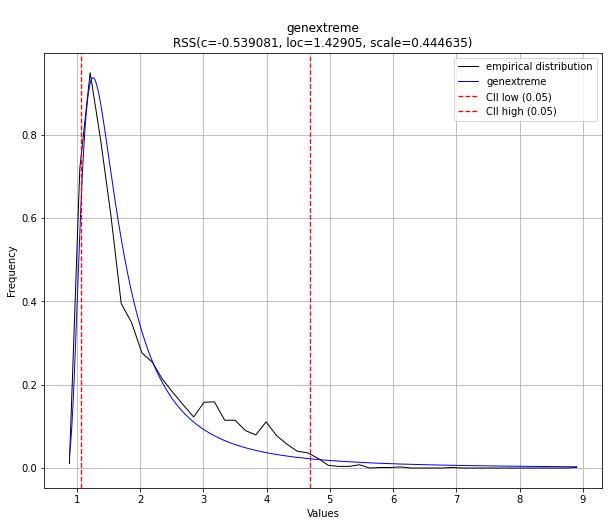

[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.5390806987426229, 1.4290529187290413, 0.44463474553906435).
[distfit] >Generate 1000 genextreme distributed samples with fitted params (-0.5390806987426229, 1.4290529187290413, 0.44463474553906435).
Perihelion Time
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 3.88155e-06] [loc=2457728.108 scale=944.126]
[distfit] >[expon     ] [0.00 sec] [RSS: 6.23155e-06] [loc=2450100.317 scale=7627.791]
[distfit] >[pareto    ] [0.10 sec] [RSS: 6.2325e-06] [loc=-72.935 scale=2450173.252]
[distfit] >[dweibull  ] [0.10 sec] [RSS: 5.67374e-07] [loc=2458016.515 scale=291.544]
[distfit] >[t         ] [0.06 sec] [RSS: 4.70309e-06] [loc=2457654.225 scale=1614.899]
[distfit] >[genextreme] [0.16 sec] [RSS: 3.22169e-06] [loc=2457594.419 scale=854.531]
[distfit] >[gamma     ] [0.07 sec] [RSS: 4.50895e-06] [loc=2446930.346 scale=157.094]
[distfit] >

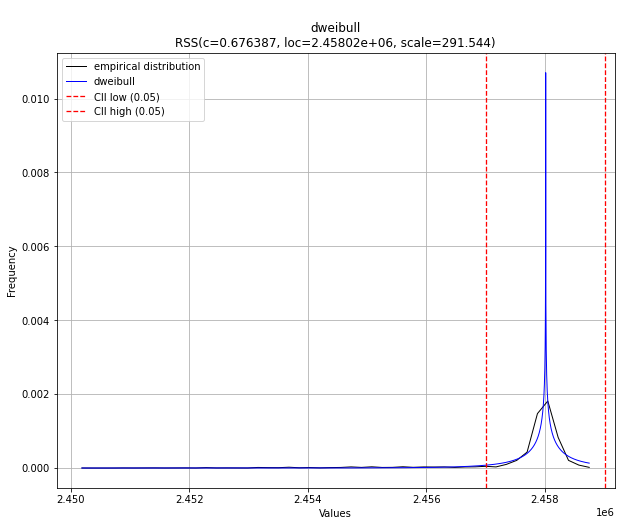

[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.6763867767336476, 2458016.5152068823, 291.54448981685886).
[distfit] >Generate 1000 dweibull distributed samples with fitted params (0.6763867767336476, 2458016.5152068823, 291.54448981685886).
Mean Anomaly
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 7.33742e-05] [loc=181.168 scale=107.490]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000103516] [loc=0.003 scale=181.165]
[distfit] >[pareto    ] [0.10 sec] [RSS: 0.000117884] [loc=-4276466.478 scale=4276466.481]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 6.86472e-05] [loc=167.101 scale=104.520]
[distfit] >[t         ] [0.06 sec] [RSS: 7.3458e-05] [loc=181.196 scale=107.438]
[distfit] >[genextreme] [0.05 sec] [RSS: 6.5834e-05] [loc=154.802 scale=116.250]
[distfit] >[gamma     ] [0.06 sec] [RSS: 7.34224e-05] [loc=-6583.030 scale=1.710]
[distfit] >[lognorm   ] [0.05 sec] [RSS: 0.000

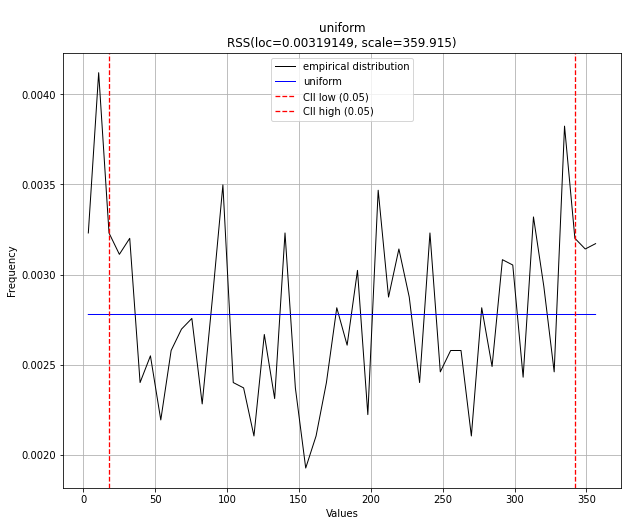

[distfit] >Generate 1000 uniform distributed samples with fitted params (0.0031914911023824, 359.91479908695675).
[distfit] >Generate 1000 uniform distributed samples with fitted params (0.0031914911023824, 359.91479908695675).
Mean Motion
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.07411] [loc=0.738 scale=0.343]
[distfit] >[expon     ] [0.00 sec] [RSS: 8.80157] [loc=0.086 scale=0.652]
[distfit] >[pareto    ] [0.10 sec] [RSS: 8.89658] [loc=-21248730.094 scale=21248730.180]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 2.40607] [loc=0.739 scale=0.313]
[distfit] >[t         ] [0.06 sec] [RSS: 2.07414] [loc=0.738 scale=0.343]
[distfit] >[genextreme] [0.06 sec] [RSS: 1.98838] [loc=0.592 scale=0.301]
[distfit] >[gamma     ] [0.03 sec] [RSS: 1.85844] [loc=0.060 scale=0.197]
[distfit] >[lognorm   ] [0.04 sec] [RSS: 2.02581] [loc=-0.471 scale=1.161]
[distfit] >[beta      ] [0.05 sec] [RSS: 1.22894] [loc=0.085

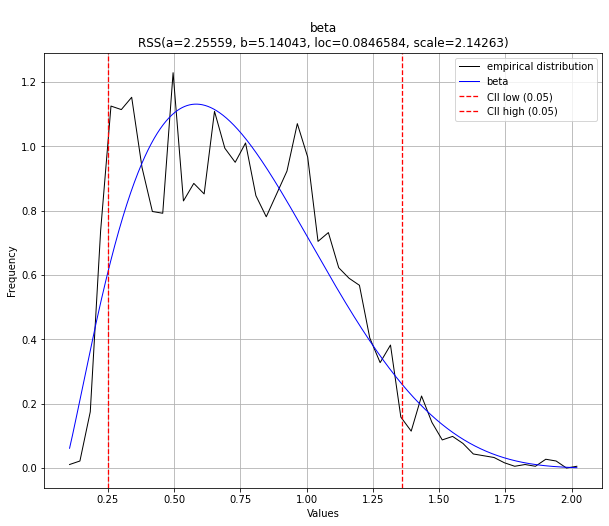

[distfit] >Generate 1000 beta distributed samples with fitted params (2.255591016230421, 5.14043270684172, 0.08465841633047595, 2.142634846391796).
[distfit] >Generate 1000 beta distributed samples with fitted params (2.255591016230421, 5.14043270684172, 0.08465841633047595, 2.142634846391796).
Est Dia in KM(min)
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.4925] [loc=0.205 scale=0.370]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0919731] [loc=0.001 scale=0.204]
[distfit] >[pareto    ] [0.07 sec] [RSS: 1.09748] [loc=-0.103 scale=0.104]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 2.34003] [loc=0.037 scale=0.134]
[distfit] >[t         ] [0.02 sec] [RSS: 0.103051] [loc=0.097 scale=0.093]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.86945] [loc=0.058 scale=0.068]
[distfit] >[gamma     ] [0.05 sec] [RSS: 6.37164] [loc=0.001 scale=1.541]
[distfit] >[lognorm   ] [0.03 sec] [RSS: 0.712022] [loc=0.001 scale=0.09

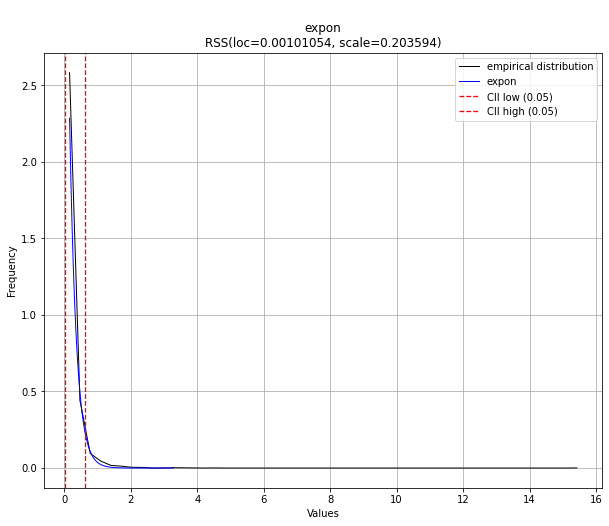

[distfit] >Generate 1000 expon distributed samples with fitted params (0.0010105434, 0.20359365961644976).
[distfit] >Generate 1000 expon distributed samples with fitted params (0.0010105434, 0.20359365961644976).
Est Dia in KM(max)
[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.4985] [loc=0.458 scale=0.826]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0183946] [loc=0.002 scale=0.455]
[distfit] >[pareto    ] [0.11 sec] [RSS: 0.193465] [loc=-14429364.847 scale=14429364.850]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 0.468007] [loc=0.082 scale=0.299]
[distfit] >[t         ] [0.02 sec] [RSS: 0.0206044] [loc=0.218 scale=0.208]
[distfit] >[genextreme] [0.07 sec] [RSS: 0.173846] [loc=0.129 scale=0.152]
[distfit] >[gamma     ] [0.07 sec] [RSS: 1.28589] [loc=0.002 scale=1.541]
[distfit] >[lognorm   ] [0.03 sec] [RSS: 0.142404] [loc=0.001 scale=0.206]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.0297985] [loc=-0.2

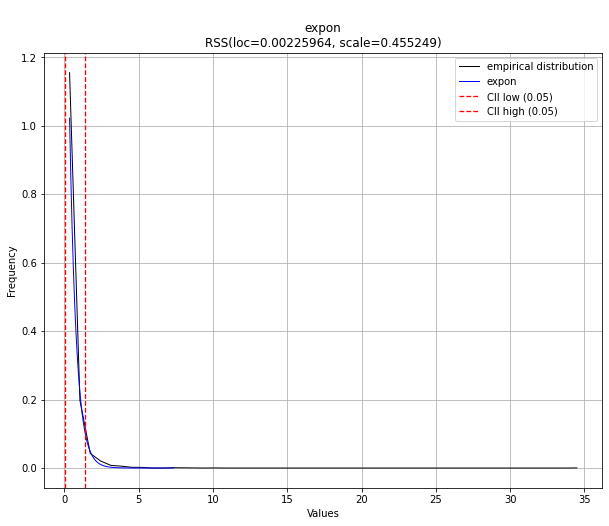

[distfit] >Generate 1000 expon distributed samples with fitted params (0.0022596438, 0.45524926262203974).
[distfit] >Generate 1000 expon distributed samples with fitted params (0.0022596438, 0.45524926262203974).


In [7]:
synthetic_data = dict()
synthetic_data_drift = dict()

selected_columns = ['Absolute Magnitude', 'avg_dia', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)', 'Orbit Uncertainity',
                    'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis',
                    'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
                    'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Est Dia in KM(min)', 'Est Dia in KM(max)']
df['avg_dia'] = df[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis=1)

for column in selected_columns:
    print(column)
    results = dist.fit_transform(df.loc[:, column])
    dist.plot()
    plt.show()
    synthetic_data[column] = dist.generate(n=1000)
    if column in ['Absolute Magnitude', 'Minimum Orbit Intersection']:
        # Introduce drift in most important parameters
        results = dist.fit_transform(df.loc[:, column] * 2)
        dist.plot()
        plt.show()
    synthetic_data_drift[column] = dist.generate(n=1000)

In [8]:
synthetic_df = pd.DataFrame.from_dict(synthetic_data)
synthetic_df.describe()

,Absolute Magnitude,avg_dia,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Est Dia in KM(min),Est Dia in KM(max)
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.318887,0.320801,49402.575757,3.914938e+07,2.952563e+07,0.094804,5.051717,2.457866e+06,0.375964,1.407851,...,177.440295,648.947190,0.817741,182.415396,2.148555,2.457991e+06,183.654830,0.744068,0.206622,0.477450
std,2.820778,0.321397,25841.733973,2.168342e+07,5.948038e+08,0.219026,1.225136,1.947794e+02,0.176577,0.569698,...,103.410298,507.569763,0.247009,102.665488,3.233828,6.983054e+02,101.592219,0.332770,0.201877,0.455104
min,13.870564,0.002393,2677.976969,6.931140e+04,7.567404e-13,-0.001105,2.331675,2.455973e+06,0.013081,0.633188,...,0.726004,131.106230,0.127797,0.003491,0.889302,2.451093e+06,0.085840,0.104888,0.001058,0.002619
25%,20.451708,0.094878,29847.167937,2.101528e+07,7.642815e-03,0.013011,4.125300,2.457816e+06,0.229050,1.021048,...,86.299921,373.512734,0.647059,95.150199,1.300282,2.457841e+06,97.927812,0.483851,0.059081,0.134588
50%,22.193835,0.226344,45627.175136,3.964241e+07,1.525989e+00,0.039283,5.010378,2.457935e+06,0.372651,1.252288,...,179.665944,493.385350,0.843912,185.510032,1.629848,2.458016e+06,181.542312,0.711475,0.147815,0.337123
75%,24.177411,0.429707,64324.545010,5.844499e+07,2.068119e+02,0.093892,5.889149,2.457989e+06,0.504937,1.633393,...,266.997205,735.094225,1.011690,268.941151,2.198179,2.458155e+06,268.913915,0.957745,0.292910,0.671499
max,30.579992,2.471872,150582.133168,7.486971e+07,1.358614e+10,4.990223,8.512755,2.458019e+06,0.877185,7.060021,...,359.386251,5136.381809,1.333983,358.986137,91.525135,2.462407e+06,359.841337,1.770286,1.650039,2.544386


In [9]:
synthetic_df_drift = pd.DataFrame.from_dict(synthetic_data_drift)
synthetic_df_drift.describe()

,Absolute Magnitude,avg_dia,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Est Dia in KM(min),Est Dia in KM(max)
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.379813,0.326146,50002.424954,3.785101e+07,5.492571e+08,0.243946,5.067450,2.457867e+06,0.386266,1.416830,...,173.118218,704.688167,0.813170,185.236785,2.418327,2.458021e+06,180.939417,0.740566,0.205223,0.454045
std,5.646617,0.323732,24253.068992,2.193383e+07,1.367979e+10,0.648332,1.277235,1.979975e+02,0.181224,0.581784,...,103.490746,811.550043,0.237618,104.946726,4.230362,6.727169e+02,103.470363,0.339516,0.201327,0.436571
min,25.844800,0.001715,4851.697448,5.913680e+04,2.954801e-10,-0.001836,2.218578,2.456122e+06,0.011664,0.678492,...,2.038070,179.581085,0.121297,0.826895,0.922298,2.454075e+06,0.149888,0.098553,0.001772,0.002590
25%,40.553929,0.093636,31222.857178,1.824978e+07,6.505237e-03,0.029530,4.099951,2.457826e+06,0.248156,1.024702,...,82.120339,365.598813,0.639131,93.112904,1.320303,2.457844e+06,92.597257,0.487989,0.064358,0.133532
50%,43.981277,0.225933,47315.267851,3.763758e+07,1.905229e+00,0.087253,5.028659,2.457939e+06,0.376230,1.263034,...,172.966006,499.602103,0.822325,181.364564,1.671555,2.458016e+06,177.627345,0.697809,0.136420,0.318104
75%,48.357607,0.457831,65509.755516,5.729316e+07,2.938664e+02,0.220235,6.006712,2.457995e+06,0.514197,1.619180,...,258.897630,758.705322,1.002962,279.466436,2.319741,2.458167e+06,273.334051,0.981339,0.283261,0.646032
max,61.945286,2.445717,133267.489246,7.481183e+07,4.142117e+11,11.452421,8.669571,2.458019e+06,0.912849,5.954381,...,358.757942,12565.709337,1.311574,359.871713,107.659650,2.463232e+06,359.779141,1.886401,1.424348,2.603540


In [10]:
import requests
import time
import random
from tqdm import tqdm

print("Sending normal data")
for _ in tqdm(range(5)):
    for i in range(len(synthetic_df)):
        response = requests.post(
            url='http://127.0.0.1:8080/serve/asteroid',
            headers={'accept': 'application/json', 'Content-Type': 'application/json'},
            json=synthetic_df.loc[i, :].to_dict()
        )
        if response.status_code != 200:
            print(f"Bad request! {response.content}")
        # time.sleep(random.randint(0, 10) / 10)

print("Sending skewed data")
for _ in tqdm(range(5)):
    for i in range(len(synthetic_df_drift)):
        response = requests.post(
            url='http://127.0.0.1:8080/serve/asteroid',
            headers={'accept': 'application/json', 'Content-Type': 'application/json'},
            json=synthetic_df_drift.loc[i, :].to_dict()
        )
        if response.status_code != 200:
            print(f"Bad request! {response.content}")
        # time.sleep(random.randint(0, 10) / 10)

Sending normal data


100%|██████████| 5/5 [02:01<00:00, 24.22s/it]


Sending skewed data


100%|██████████| 5/5 [02:00<00:00, 24.02s/it]


# Adding drift!

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nRSS(loc=0.0361543, scale=7.28399)'}, xlabel='Values', ylabel='Frequency'>)

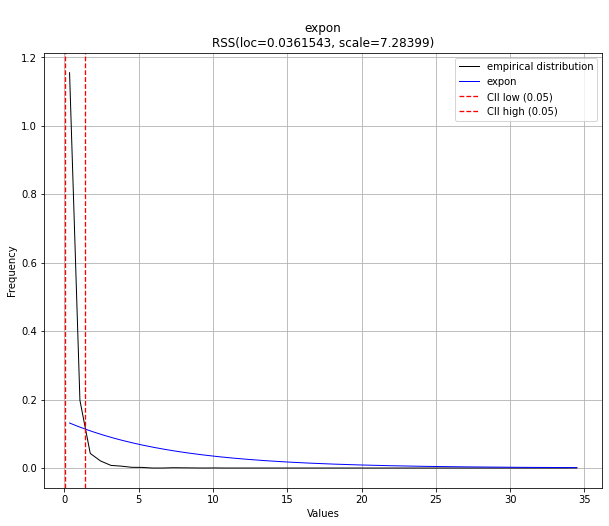

In [127]:
dist.model['params'] = tuple(param * 2 for param in dist.model['params'])
dist.plot()

In [141]:
dist.model['model']